In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

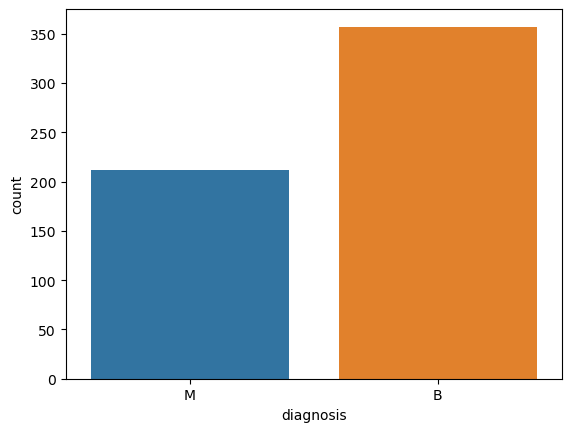

In [4]:
df = df.drop(['id'], axis = 'columns')
sns.countplot(x='diagnosis',data=df)

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
x = df.drop('diagnosis',axis=1)
y = df[['diagnosis']]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

# Apply Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset
pred = dt.predict(xtest) # pred is corrsponding to ytest
dt.score(xtest,ytest)

0.9473684210526315

# Evaluate the ML Model

In [10]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           B       0.98      0.94      0.96       108\n           M       0.90      0.97      0.93        63\n\n    accuracy                           0.95       171\n   macro avg       0.94      0.95      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

In [11]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.98      0.94      0.96       108
           M       0.90      0.97      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [12]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [13]:
test_confusion_matrix

array([[101,   7],
       [  2,  61]], dtype=int64)

<Axes: >

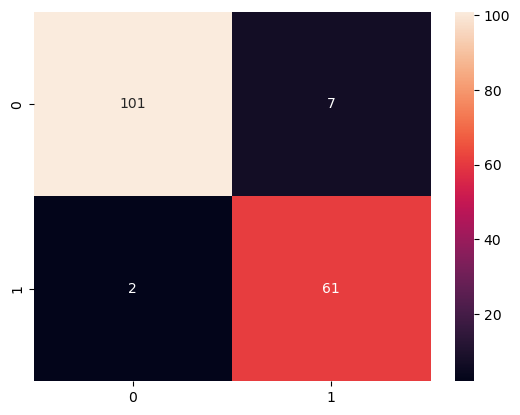

In [15]:
sns.heatmap(test_confusion_matrix, annot=True,fmt='g')

In [16]:
tp, fp, fn, tn = confusion_matrix(ytest,pred).reshape(-1)
tp

101

In [19]:
print(f'fp={fp},fn={fn},tn={tn}')

fp=7,fn=2,tn=61


In [20]:
dt.score(xtest,ytest)

0.9473684210526315

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # default parameters, 100 Tree = n_estimators=100
clf.fit(xtrain, ytrain)
clf.score(xtest, ytest)

0.9707602339181286

# Randomized Search CV

In [22]:
# creating param_distributions for random forest
import numpy as np
trees = np.random.randint(15,150,30) # will generate 30 values in range of 15-150
trees

array([ 92, 142, 123,  95,  35,  45, 113,  65, 149,  83, 126,  49,  71,
        37,  68,  17, 100, 110, 146, 117,  52, 108, 149,  21, 108, 107,
        29, 103,  86, 105])

In [23]:
from scipy.stats import randint

grids = {
    'n_estimators' : trees,
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini','entropy'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rcv = RandomizedSearchCV(clf, grids, n_iter=200, cv=3)
rcv.fit(xtrain, ytrain)
rcv.cv_results_

{'mean_fit_time': array([0.23886474, 0.47391009, 0.35069275, 0.48473406, 0.20279121,
        0.16755088, 0.3437477 , 0.15591566, 0.104719  , 0.34673897,
        0.48902527, 0.4065791 , 0.46641914, 0.28158013, 0.30884051,
        0.33909289, 0.40558155, 0.37200514, 0.23171337, 0.27493143,
        0.34873327, 0.38463759, 0.33920717, 0.11976345, 0.28826753,
        0.49019059, 0.39053337, 0.34121982, 0.37491131, 0.47323124,
        0.4269824 , 0.2082839 , 0.42698288, 0.22901042, 0.43730474,
        0.48320635, 0.38294943, 0.47702694, 0.0624849 , 0.33846156,
        0.27076904, 0.35928981, 0.37230341, 0.20828358, 0.16141987,
        0.33325442, 0.39882239, 0.29680538, 0.25743333, 0.23737828,
        0.29935257, 0.47117559, 0.09372799, 0.17704082, 0.11708585,
        0.34887552, 0.33846196, 0.33087571, 0.49144506, 0.23167936,
        0.42431323, 0.39574003, 0.1562136 , 0.12274408, 0.34856407,
        0.12025865, 0.39053281, 0.40348808, 0.39053257, 0.46597346,
        0.46077092, 0.32284037,

In [25]:
tuning_result = pd.DataFrame(rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.238865,0.017804,0.022939,1.628689e-03,gini,4,sqrt,5,7,65,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.924812,0.947368,0.939394,0.937191,0.009339,133
1,0.473910,0.005612,0.041741,6.512967e-03,gini,3,sqrt,8,19,149,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.924812,0.939850,0.931818,0.932160,0.006144,182
2,0.350693,0.019305,0.030639,5.196849e-03,entropy,4,log2,4,18,100,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.924812,0.954887,0.946970,0.942223,0.012729,58
3,0.484734,0.029772,0.035595,4.362480e-04,gini,3,log2,8,3,146,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.924812,0.932331,0.939394,0.932179,0.005954,176
4,0.202791,0.011085,0.025598,7.389023e-03,gini,None,log2,3,9,52,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.924812,0.954887,0.931818,0.937172,0.012849,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.231669,0.003749,0.020828,7.363841e-03,entropy,None,log2,6,11,71,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.917293,0.947368,0.946970,0.937210,0.014085,126
196,0.153621,0.003665,0.015621,0.000000e+00,entropy,5,sqrt,9,12,45,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.917293,0.954887,0.939394,0.937191,0.015426,133
197,0.275977,0.007363,0.026036,7.364178e-03,entropy,3,sqrt,7,6,83,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.932331,0.947368,0.931818,0.937172,0.007213,148
198,0.343669,0.012755,0.026036,7.363954e-03,gini,None,sqrt,1,17,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.924812,0.962406,0.939394,0.942204,0.015476,72


In [26]:
rcv.best_score_

0.967304625199362

In [27]:
rcv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 83}

In [28]:
clf2 = rcv.best_estimator_
clf2.fit(xtrain, ytrain)
clf2.score(xtest, ytest)

0.9707602339181286

# Post-Pruning

In [29]:
# Define the random forest classifier with ccp_alpha parameter
rfc = DecisionTreeClassifier(ccp_alpha=0.0)

# Define the parameter grid for GridSearchCV
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

# Print the best parameter values and the corresponding accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

print("Test Score: ", grid_search.score(xtest, ytest))

Best Parameters:  {'ccp_alpha': 0.01}
Best Score:  0.9246835443037975
Test Score:  0.9707602339181286
